<a href="https://colab.research.google.com/github/maichonlada/github-slideshow/blob/master/third_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

!pip install graphviz
# conda install python-graphviz

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
path = "/content/drive/MyDrive/Colab Notebooks/df_by_res.csv"
df = pd.read_csv(path)

In [58]:
print(df.shape)
df.drop(['Unnamed: 0','business_type_id','day','yearmonth'],axis=1,inplace=True)
print(df.shape)
df.head()

(468, 13)
(468, 9)


,restaurant_id,is_key_acc,res_size,area_code,day_name,avg_gmv,avg_basket_size,no_transaction,Churn
0,851,False,Stand alone,A,Wed,564.960,9.0,1,Yes
1,2067,False,Chain restaurant,B,Sun,653.770,12.0,1,Yes
2,2092,False,Stand alone,C,Mon,1730.728,21.2,5,No
3,4095,False,Other,A,Fri,3303.090,12.0,1,Yes
4,4863,False,Stand alone,A,Sun,1182.710,15.0,1,Yes


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_id    468 non-null    int64  
 1   is_key_acc       468 non-null    bool   
 2   res_size         468 non-null    object 
 3   area_code        468 non-null    object 
 4   day_name         468 non-null    object 
 5   avg_gmv          468 non-null    float64
 6   avg_basket_size  468 non-null    float64
 7   no_transaction   468 non-null    int64  
 8   Churn            468 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 29.8+ KB


# 4. Data Pre-Processing Phase

In [60]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature restaurant_id :468
The number of values for feature is_key_acc :2 -- [False  True]
The number of values for feature res_size :8 -- ['Central kitchen' 'Chain restaurant' 'Hospital' 'Hotel' 'Kiosk/temp'
 'Other' 'Stand alone' 'food-manufacturer']
The number of values for feature area_code :9 -- ['A' 'B' 'C' 'D' 'E' 'G' 'P' 'X' 'Z']
The number of values for feature day_name :7 -- ['Fri' 'Mon' 'Sat' 'Sun' 'Thu' 'Tue' 'Wed']
The number of values for feature avg_gmv :466
The number of values for feature avg_basket_size :321
The number of values for feature no_transaction :77
The number of values for feature Churn :2 -- ['No' 'Yes']


In [61]:
df.isnull().sum()

restaurant_id      0
is_key_acc         0
res_size           0
area_code          0
day_name           0
avg_gmv            0
avg_basket_size    0
no_transaction     0
Churn              0
dtype: int64

In [62]:
df.columns

Index(['restaurant_id', 'is_key_acc', 'res_size', 'area_code', 'day_name',
       'avg_gmv', 'avg_basket_size', 'no_transaction', 'Churn'],
      dtype='object')

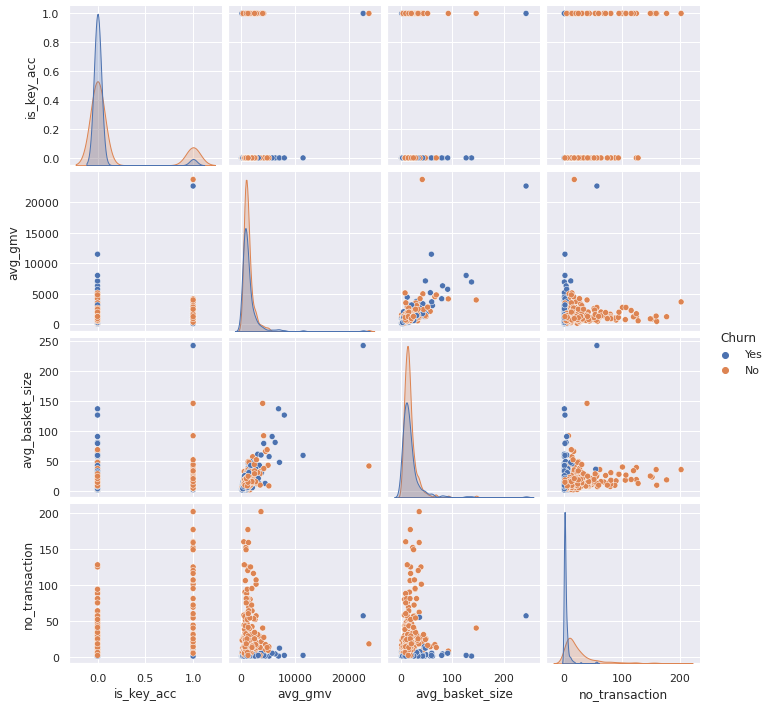

In [63]:
# Limiting the data
df2 = df[['is_key_acc', 'res_size',
       'area_code', 'day_name', 'avg_gmv',
       'avg_basket_size', 'no_transaction', 'Churn']]

# Visualize the data using seaborn Pairplots
g = sns.pairplot(df2, hue = 'Churn', diag_kws={'bw': 0.2})

Most restaurants who churned tend to have low number of transaction

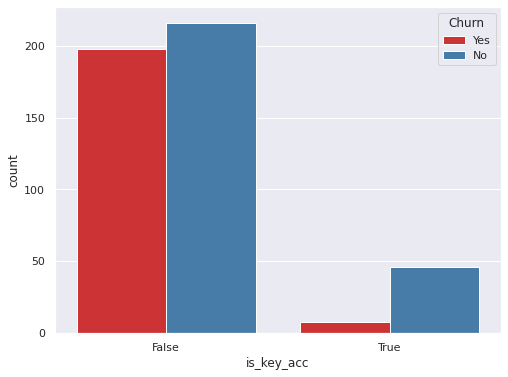

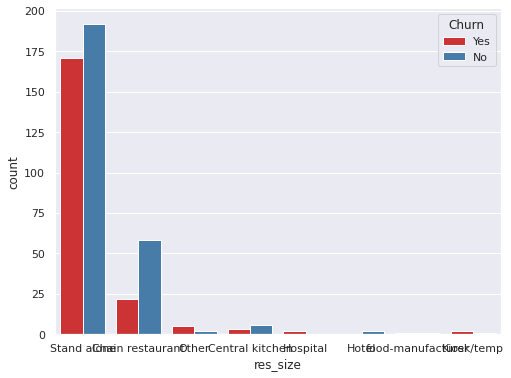

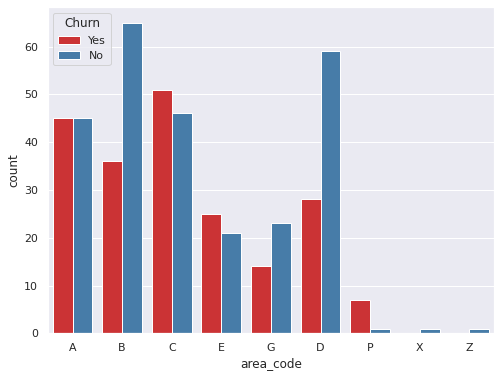

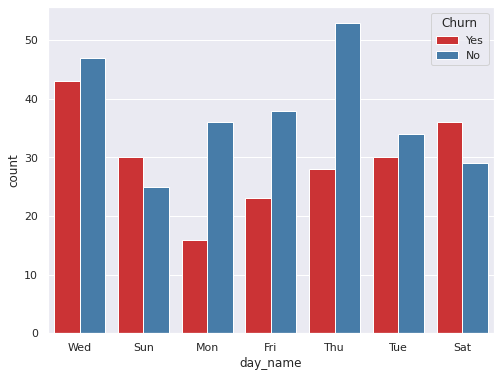

In [64]:
# Investigate all the features by our y

features = [ 'is_key_acc', 'res_size',
       'area_code', 'day_name']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=df2, hue = 'Churn', palette="Set1")

In [65]:
df2.head()

,is_key_acc,res_size,area_code,day_name,avg_gmv,avg_basket_size,no_transaction,Churn
0,False,Stand alone,A,Wed,564.960,9.0,1,Yes
1,False,Chain restaurant,B,Sun,653.770,12.0,1,Yes
2,False,Stand alone,C,Mon,1730.728,21.2,5,No
3,False,Other,A,Fri,3303.090,12.0,1,Yes
4,False,Stand alone,A,Sun,1182.710,15.0,1,Yes


In [81]:
# Making categorical variables into numeric representation

new_df = pd.get_dummies(df2, columns = ['is_key_acc', 'res_size' ,'area_code','day_name'])
new_df.head()

,avg_gmv,avg_basket_size,no_transaction,Churn,is_key_acc_False,is_key_acc_True,res_size_Central kitchen,res_size_Chain restaurant,res_size_Hospital,res_size_Hotel,res_size_Kiosk/temp,res_size_Other,res_size_Stand alone,res_size_food-manufacturer,area_code_A,area_code_B,area_code_C,area_code_D,area_code_E,area_code_G,area_code_P,area_code_X,area_code_Z,day_name_Fri,day_name_Mon,day_name_Sat,day_name_Sun,day_name_Thu,day_name_Tue,day_name_Wed
0,564.960,9.0,1,Yes,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,653.770,12.0,1,Yes,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1730.728,21.2,5,No,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,3303.090,12.0,1,Yes,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1182.710,15.0,1,Yes,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [80]:

# Scaling our columns

scale_vars = ['avg_gmv'
              #,'avg_basket_size'
              #,'no_transaction'
              ]
scaler = MinMaxScaler()
new_df[scale_vars] = scaler.fit_transform(new_df[scale_vars])
new_df.head()

,avg_gmv,avg_basket_size,no_transaction,Churn,is_key_acc_False,is_key_acc_True,res_size_Central kitchen,res_size_Chain restaurant,res_size_Hospital,res_size_Hotel,res_size_Kiosk/temp,res_size_Other,res_size_Stand alone,res_size_food-manufacturer,area_code_A,area_code_B,area_code_C,area_code_D,area_code_E,area_code_G,area_code_P,area_code_X,area_code_Z,day_name_Fri,day_name_Mon,day_name_Sat,day_name_Sun,day_name_Thu,day_name_Tue,day_name_Wed
0,0.021121,9.0,1,Yes,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.024867,12.0,1,Yes,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.070290,21.2,5,No,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.136609,12.0,1,Yes,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.047176,15.0,1,Yes,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 5. Splitting the Raw Data - Hold-out validation

In [82]:
# Your code goes here
X = new_df.drop('Churn', axis=1).values# Input features (attributes)
y = new_df['Churn'].values # Target vector

print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size=0.25, random_state=0)

X shape: (468, 29)
y shape: (468,)


# 6. Running Decision Tree


In [83]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
dt.fit(X_train, y_train)

# Doc:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

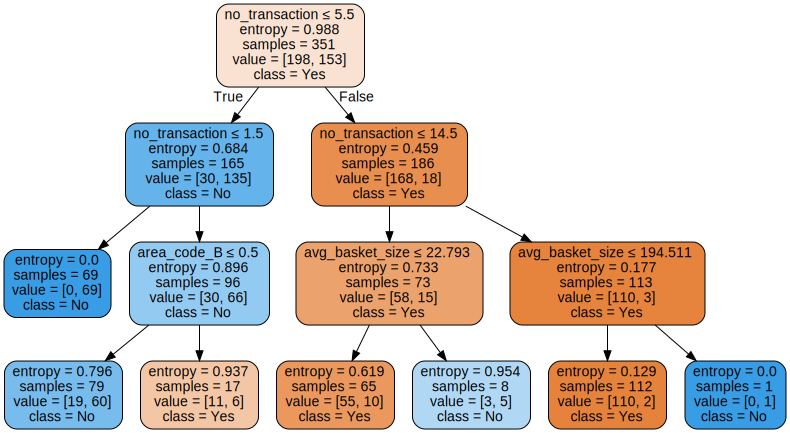

In [84]:
import graphviz 

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=new_df.drop('Churn', axis=1).columns,    
    class_names=new_df['Churn'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [88]:
#del final_fi

# Calculating FI
for i, column in enumerate(new_df.drop('Churn', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi3 = pd.concat([final_fi3,fi], ignore_index = True)
    except:
        final_fi3 = fi
        
        
# Ordering the data
final_fi3 = final_fi3.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi3.head()

Importance of feature avg_gmv:, 0.000
Importance of feature avg_basket_size:, 0.054
Importance of feature no_transaction:, 0.911
Importance of feature is_key_acc_False:, 0.000
Importance of feature is_key_acc_True:, 0.000
Importance of feature res_size_Central kitchen:, 0.000
Importance of feature res_size_Chain restaurant:, 0.000
Importance of feature res_size_Hospital:, 0.000
Importance of feature res_size_Hotel:, 0.000
Importance of feature res_size_Kiosk/temp:, 0.000
Importance of feature res_size_Other:, 0.000
Importance of feature res_size_Stand alone:, 0.000
Importance of feature res_size_food-manufacturer:, 0.000
Importance of feature area_code_A:, 0.000
Importance of feature area_code_B:, 0.035
Importance of feature area_code_C:, 0.000
Importance of feature area_code_D:, 0.000
Importance of feature area_code_E:, 0.000
Importance of feature area_code_G:, 0.000
Importance of feature area_code_P:, 0.000
Importance of feature area_code_X:, 0.000
Importance of feature area_code_Z:,

,index,Variable,Feature Importance Score
0,2,no_transaction,0.910926
1,1,avg_basket_size,0.053959
2,14,area_code_B,0.035115
3,16,area_code_D,0.000000
4,27,day_name_Tue,0.000000


In [89]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.886039886039886
Testing Accuracy is:  0.811965811965812


In [90]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

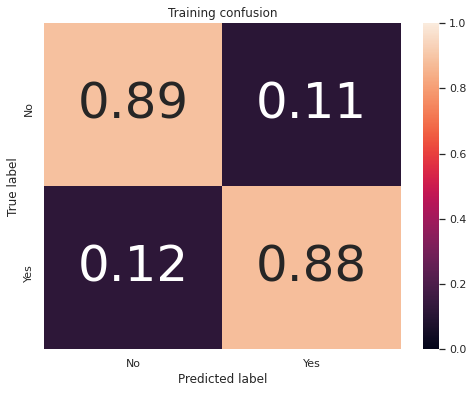

In [91]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [92]:
y_pred = dt.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[176,  22],
       [ 18, 135]])

In [93]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

# Explenations:https://youtu.be/0HDy6n3UD5M

The True Positive rate / Recall per class is:  [0.888889 0.882353]
The Precision per class is:  [0.907216 0.859873]
The False Alarm rate per class is:  [0.117647 0.111111]
The Miss Rate rate per class is:  [0.111111 0.117647]
The Classification error of each class is [0.113960 0.113960]
The Accuracy of each class is [0.886040 0.886040]

The average Recall is:  0.8856209150326797
The average Precision is:  0.8835445531551644
The average False Alarm is:  0.11437908496732026
The average Miss Rate rate is:  0.11437908496732026
The average Classification error is 0.11396011396011396
The average Accuracy is 0.886039886039886


# 7. Running Random Forest

Training Accuracy is:  1.0
Testing Accuracy is:  0.7948717948717948


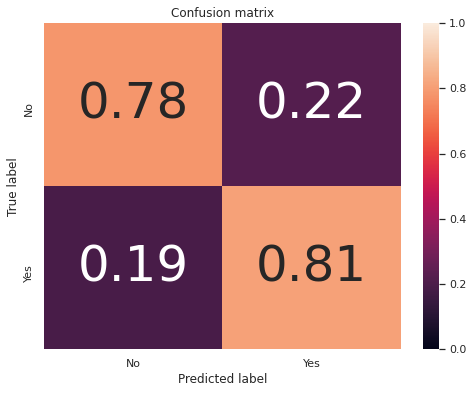

In [94]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.786
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.547
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.667
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.769
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.795
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.812
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.838
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.821
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.821
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.821
Classification accuracy on test set with max features = log2 and max_depth = None: 0.812
Classification accuracy on test set with max features = log2

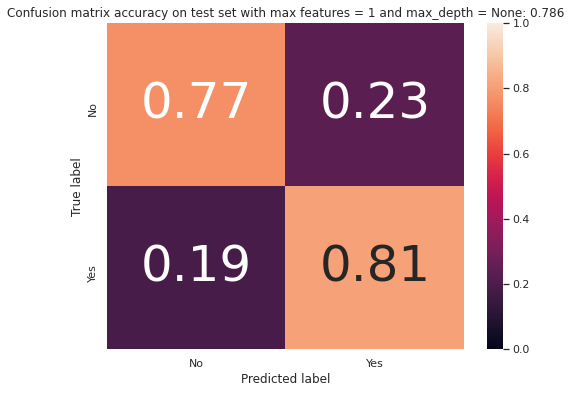

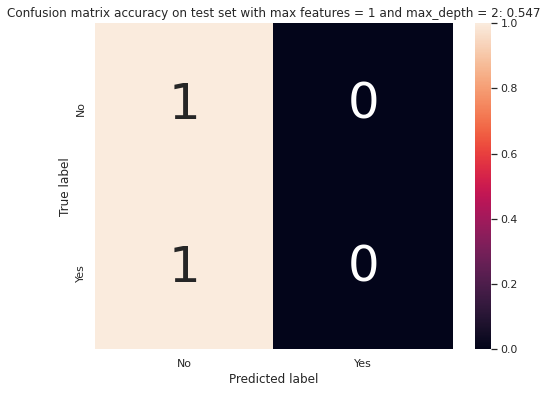

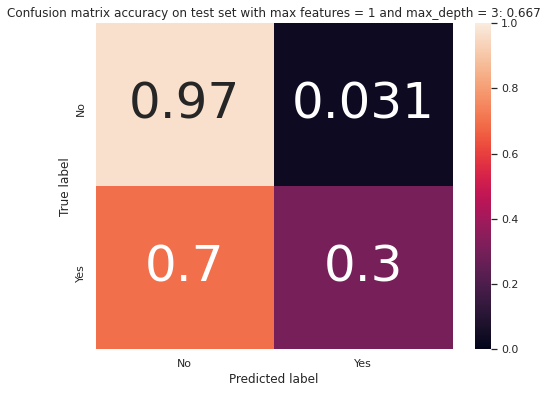

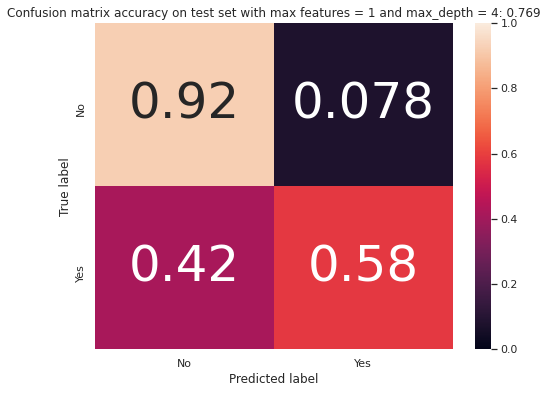

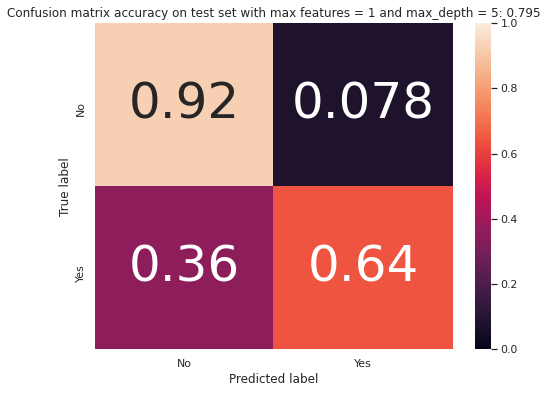

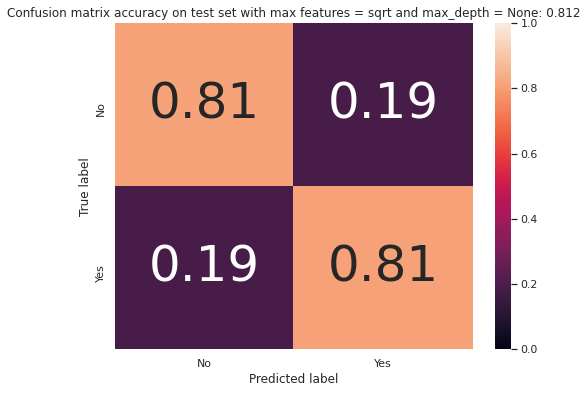

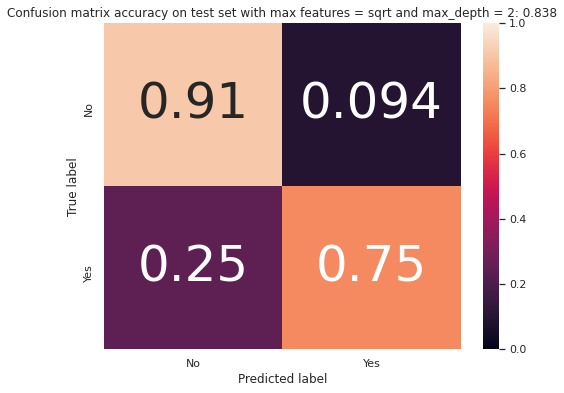

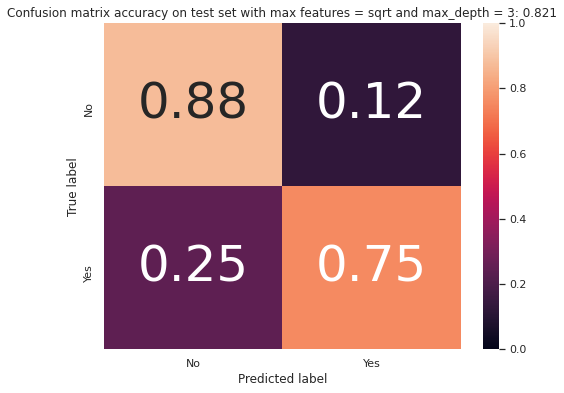

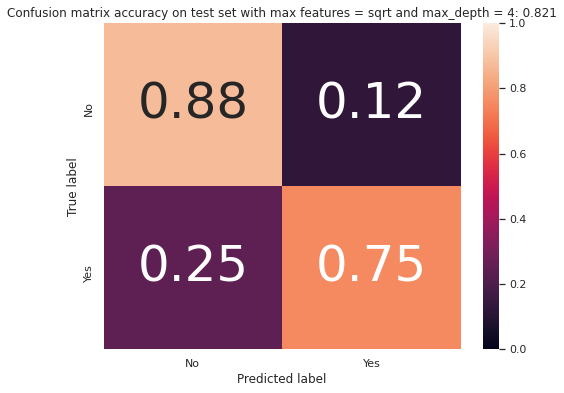

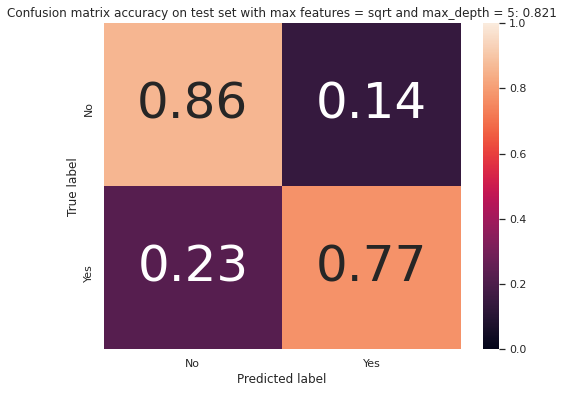

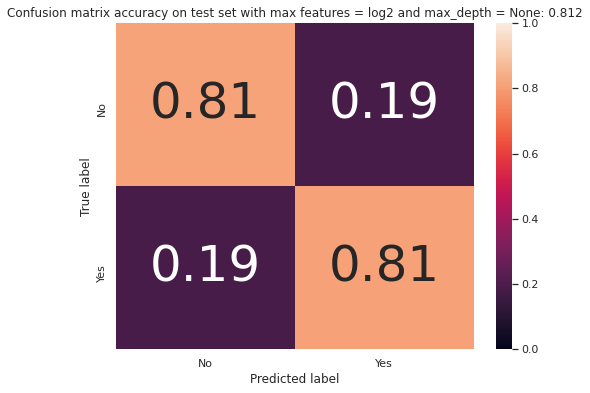

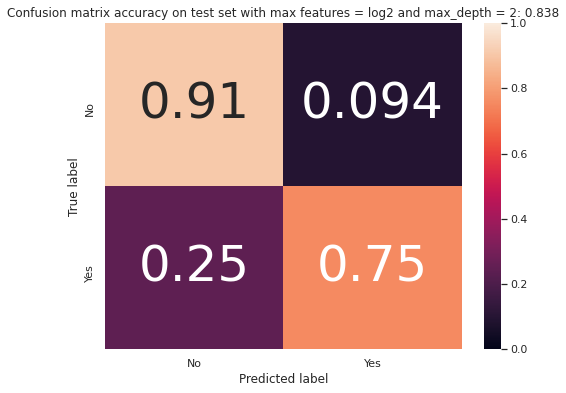

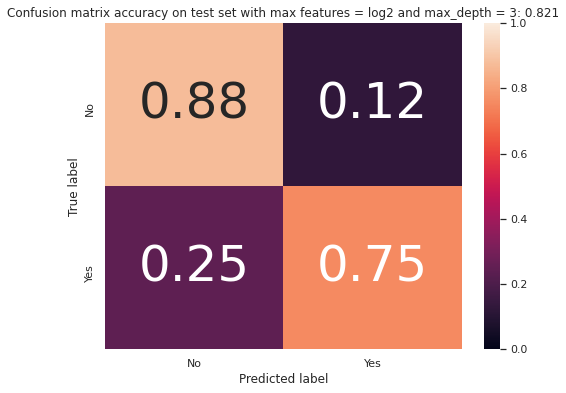

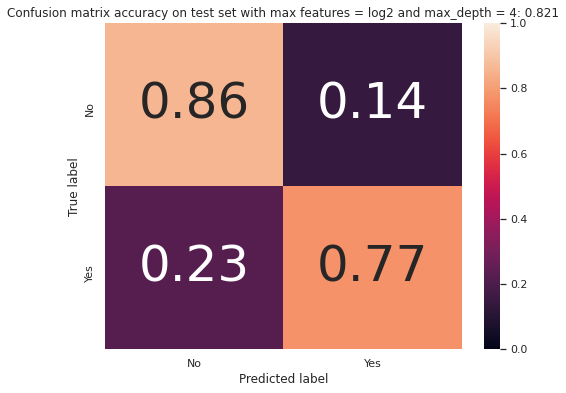

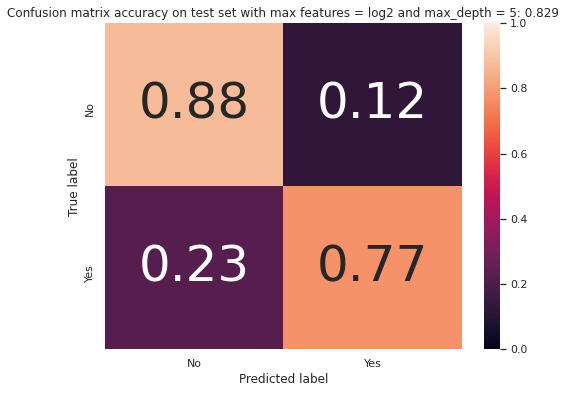

In [95]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))